# Simulation12

**Mengqi Liu**

**Jan 12, 2023**
___

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

In [2]:
def Z_to_Y(Z):
    return Z

def Z_to_Y4(Z):
    return Z**2

def Z_to_Y5(Z):
    return 1 - Z**3

In [29]:
funcs = [Z_to_Y, Z_to_Y4, Z_to_Y5]
xfuns = ['$P(X=1) = Z $', '$P(X=1)= Z^2 $', '$P(X=1) = 1-Z^3 $']
yfuns = ['$P(Y=1) = Z $', '$P(Y=1) = Z^2 $', '$P(Y=1) = 1-Z^3$']

In [46]:
Ms = [2.0, 5.0, 16.0, 25.0, 32.0, 50.0]


In [47]:
def compute_dtv(n, m, funcs, xf, yf):
    intvals = np.linspace(0, 1, int(m+1))
    x_fvalues = [funcs[xf](i) for i in intvals]
    y_fvalues = [funcs[yf](i) for i in intvals]
    #diffs = [np.max(np.abs([x_fvalues[i]-y_fvalues[i], x_fvalues[i]-y_fvalues[i+1], x_fvalues[i+1]-y_fvalues[i], x_fvalues[i+1]-y_fvalues[i+1]]))for i in range(m)]
    diffs = [np.min(np.abs([x_fvalues[i]-x_fvalues[i+1], y_fvalues[i]-y_fvalues[i+1]]))for i in range(m)]
    return np.max(diffs) / m

def compute_dtv_mean(n, m, funcs, xf, yf, k=20):
    intvals = np.linspace(0, 1, int(m+1)*k)
    x_fvalues = [funcs[xf](i) for i in intvals]
    y_fvalues = [funcs[yf](i) for i in intvals]
    #diffs = [np.max(np.abs([x_fvalues[i]-y_fvalues[i], x_fvalues[i]-y_fvalues[i+1], x_fvalues[i+1]-y_fvalues[i], x_fvalues[i+1]-y_fvalues[i+1]]))for i in range(m)]
    diffs = [np.abs(y_fvalues[i*k+j]*(x_fvalues[i*k+p]-y_fvalues[i*k+q]))/m for q in range(k) for p in range(k) for j in range(k) for i in range(m)]
    return np.min([1.0, np.mean(diffs)*n])

In [67]:
def compute_neg_entropy(z):
    x, y = z
    kl = x * math.log(x/y) + (1-x) * math.log((1-x)/(1-y))
    return -kl

def compute_int_max(x1, x2, y1, y2):
    # kl = 0
    # if x1<=0.5 and x2>=0.5:
    #     kl += 2 * 0.5 * math.log(0.5)
    # else:
    #     kl += np.max([compute_entropy(x1, x1), compute_entropy(x2, x2)])
    # kl -= np.min([compute_entropy(x1, y1), compute_entropy(x2, y2), compute_entropy(x1, y2), compute_entropy(x2, y1)])
    # return kl
    # if np.max([np.abs(y1-x1), np.abs(y1-x2)]) < np.max([np.abs(y2-x1), np.abs(y2-x2)]):
    #     kl -= np.max([compute_entropy(x1, y2), compute_entropy(x2)])
    bounds = [(np.min([x1, x2]), np.max([x1, x2])), (np.min([y1, y2]), np.max([y1, y2]))]
    initial_guess = [(x1 + x2) / 2, (y1 + y2) / 2]
    opt_result = minimize(compute_neg_entropy, initial_guess, bounds=bounds)
    max_value = -opt_result.fun
    return max_value


def compute_kl_max(n, m, funcs, xf, yf):
    intvals = np.linspace(0, 1, int(m+1))
    intvals[0] = 10**(-5)
    intvals[-1] = 1 - 10**(-5)
    x_fvalues = [funcs[xf](i) for i in intvals]
    y_fvalues = [funcs[yf](i) for i in intvals]
    diffs = [compute_int_max(x_fvalues[i], x_fvalues[i+1], y_fvalues[i], y_fvalues[i+1]) for i in range(m)]
    return np.sum(diffs) / m


In [6]:
# def compute_entropy(x, y, x1, y1):
#     xy = np.clip(x*y, 10**(-5), 1-10**(-5))
#     xy1 = np.clip(x1*y1, 10**(-5), 1-10**(-5))
#     kl = xy * math.log(xy/xy1) + (1-xy) * math.log((1-xy)/(1-xy1))
#     return kl
def compute_entropy(x, x1):
    x = np.clip(x, 10**(-5), 1-10**(-5))
    x1 = np.clip(x1, 10**(-5), 1-10**(-5))
    kl = x * math.log(x/x1) + (1-x) * math.log((1-x)/(1-x1))
    return kl


def compute_kl_mean(n, m, funcs, xf, yf, k=20):
    intvals = np.linspace(0, 1, int(m+1)*k)
    x_fvalues = [funcs[xf](i) for i in intvals]
    y_fvalues = [funcs[yf](i) for i in intvals]
    diffs = [np.mean([compute_entropy(x_fvalues[i*k+p], x_fvalues[i*k+q]) for q in range(k) for p in range(k)]) for i in range(m)]
    return np.mean(diffs)*n

In [25]:
theo_kl

[95.94114361351485,
 23.022727523422283,
 3.15553884847251,
 1.444340215117238,
 0.9407978745792482,
 0.44339869441533]

In [24]:
theo_dtv 

[283.3796776651845,
 95.46638270470912,
 27.565305216106527,
 17.382031673572406,
 13.495606882085173,
 8.575044082181504]

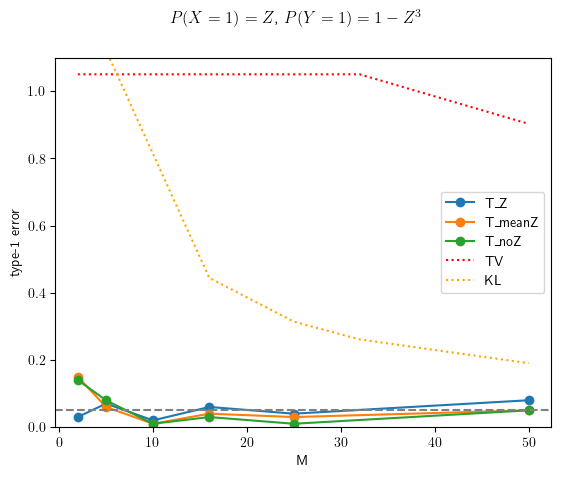

In [57]:
result = pd.read_csv("./results/result_n100_ber_func_0_2.csv", index_col=0)
result.columns = pd.Series(result.columns.astype('float')).round(2).values
result = result[result.columns.sort_values()].iloc[[2,3,4],:]
theo_kl = [np.sqrt(0.5*compute_kl_mean(100, int(m), funcs, 0, 2))+0.05 for m in Ms]
theo_dtv = [compute_dtv_mean(100, int(m), funcs, 0, 2)+0.05 for m in Ms]
result.index = ["T_Z", "T_meanZ", "T_noZ"]
plt.plot(result.T, '-o')
plt.plot(Ms, theo_dtv, linestyle=":", color="red")
plt.plot(Ms, theo_kl, linestyle=":", color="orange")
plt.xlabel("M")
plt.ylabel("type-1 error")
plt.legend(list(result.index.values) +["TV", "KL"])
plt.ylim([0, 1.1])
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.rcParams['text.usetex'] = True
fig = plt.gcf()
plt.suptitle(r"{}, {}".format(xfuns[0], yfuns[2]))
plt.savefig("./figures/val02_100.png")
plt.show()


In [119]:
theo_kl


[0.3965110256776479,
 0.09460645701063429,
 0.054027529527183295,
 0.05162914583415637,
 0.05098930965568674,
 0.05040232829448035]

In [120]:
theo_dtv

[0.3, 0.09, 0.05390625, 0.05160000000000001, 0.0509765625, 0.0504]

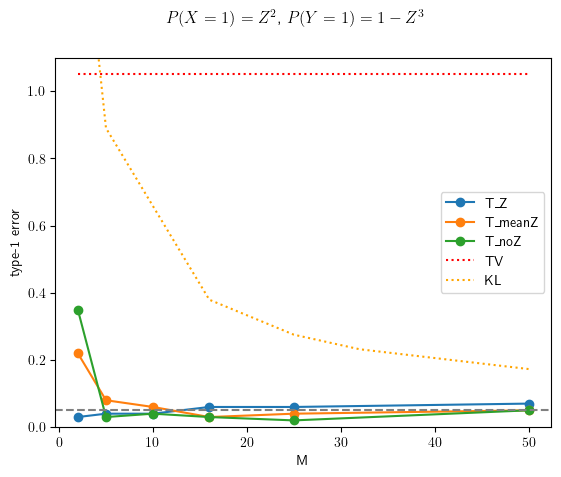

In [58]:

result = pd.read_csv("./results/result_n100_ber_func_1_2.csv", index_col=0)
result.columns = pd.Series(result.columns.astype('float')).round(2).values
result = result[result.columns.sort_values()].iloc[[2,3,4],:]
theo_kl = [np.sqrt(0.5*compute_kl_mean(100, int(m), funcs, 1, 2))+0.05 for m in Ms]
theo_dtv = [compute_dtv_mean(100, int(m), funcs, 1, 2)+0.05 for m in Ms]
result.index = ["T_Z", "T_meanZ", "T_noZ"]
plt.plot(result.T, '-o')
plt.plot(Ms, theo_dtv, linestyle=":", color="red")
plt.plot(Ms, theo_kl, linestyle=":", color="orange")
plt.xlabel("M")
plt.ylabel("type-1 error")
plt.legend(list(result.index.values) +["TV", "KL"])
plt.ylim([0, 1.1])
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.rcParams['text.usetex'] = True
fig = plt.gcf()
plt.suptitle(r"{}, {}".format(xfuns[1], yfuns[2]))
#plt.savefig("./figures/val12_100.png")
plt.show()



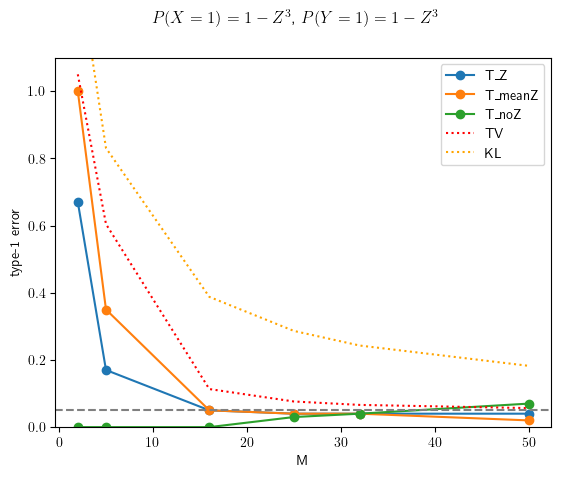

In [59]:
result = pd.read_csv("./results/result_n1000_ber_func_2_2.csv", index_col=0)
result.columns = pd.Series(result.columns.astype('float')).round(2).values
result = result[result.columns.sort_values()].iloc[[2,3,4],:]
theo_dtv = [compute_dtv_mean(100, int(m), funcs, 2, 2)+0.05 for m in Ms]
theo_kl = [np.sqrt(0.5*compute_kl_mean(100, int(m), funcs, 2, 2))+0.05 for m in Ms]
result.index = ["T_Z", "T_meanZ", "T_noZ"]
plt.plot(result.T, '-o')
plt.plot(Ms, theo_dtv, linestyle=":", color="red")
plt.plot(Ms, theo_kl, linestyle=":", color="orange")
plt.xlabel("M")
plt.ylabel("type-1 error")
plt.legend(list(result.index.values) +["TV", "KL"])
plt.ylim([0, 1.1])
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.rcParams['text.usetex'] = True
fig = plt.gcf()
plt.suptitle(r"{}, {}".format(xfuns[2], yfuns[2]))
plt.savefig("./figures/val22_100.png")
plt.show()


In [30]:
theo_dtv

[21.30558720168777,
 5.593069324381681,
 0.6831926983504272,
 0.31306125338780755,
 0.21122493399968556,
 0.11630301151113161]

In [31]:
theo_kl

[3.5772702847761266,
 1.268812210456229,
 0.27807632015102535,
 0.1616970298938001,
 0.1243787661011001,
 0.08505774582221584]

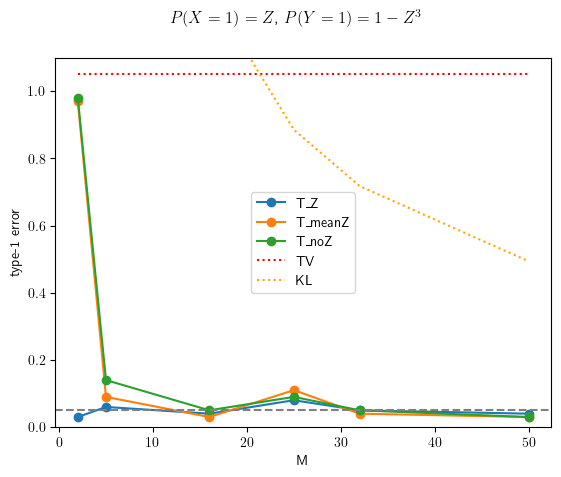

In [60]:
result = pd.read_csv("./results/result_n1000_ber_func_0_2.csv", index_col=0)
result.columns = pd.Series(result.columns.astype('float')).round(2).values
result = result[result.columns.sort_values()].iloc[[2,3,4],:]
theo_kl = [np.sqrt(0.5*compute_kl_mean(1000, int(m), funcs, 0, 2))+0.05 for m in Ms]
theo_dtv = [compute_dtv_mean(1000, int(m), funcs, 0, 2)+0.05 for m in Ms]
result.index = ["T_Z", "T_meanZ", "T_noZ"]
plt.plot(result.T, '-o')
plt.plot(Ms, theo_dtv, linestyle=":", color="red")
plt.plot(Ms, theo_kl, linestyle=":", color="orange")
plt.xlabel("M")
plt.ylabel("type-1 error")
plt.legend(list(result.index.values) +["TV", "KL"])
plt.ylim([0, 1.1])
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.rcParams['text.usetex'] = True
fig = plt.gcf()
plt.suptitle(r"{}, {}".format(xfuns[0], yfuns[2]))
plt.savefig("./figures/val02_1000.png")
plt.show()

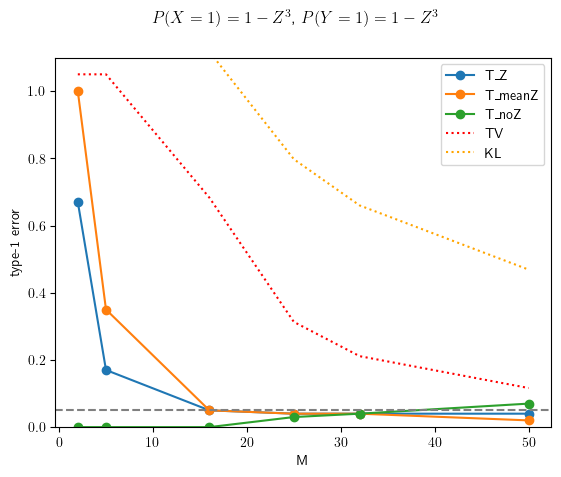

In [62]:
result = pd.read_csv("./results/result_n1000_ber_func_2_2.csv", index_col=0)
result.columns = pd.Series(result.columns.astype('float')).round(2).values
result = result[result.columns.sort_values()].iloc[[2,3,4],:]
theo_dtv = [compute_dtv_mean(1000, int(m), funcs, 2, 2)+0.05 for m in Ms]
theo_kl = [np.sqrt(0.5*compute_kl_mean(1000, int(m), funcs, 2, 2))+0.05 for m in Ms]
result.index = ["T_Z", "T_meanZ", "T_noZ"]
plt.plot(result.T, '-o')
plt.plot(Ms, theo_dtv, linestyle=":", color="red")
plt.plot(Ms, theo_kl, linestyle=":", color="orange")
plt.xlabel("M")
plt.ylabel("type-1 error")
plt.legend(list(result.index.values) +["TV", "KL"])
plt.ylim([0, 1.1])
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.rcParams['text.usetex'] = True
fig = plt.gcf()
plt.suptitle(r"{}, {}".format(xfuns[2], yfuns[2]))
plt.savefig("./figures/val22_1000.png")
plt.show()